# Predicción de precio  de Acción  Índice Ibovespa 

## Objetivo

Realizar modelo de regresión lineal capaz de predecir la apertura de una acción del índice Ibovespa teniendo como base datos de analisis acciones negociadas entre 1994 y 2020 .

## Descripción

Dado un dataset que reflejan acciones negociadas en la bolsa B3 de 1994 a 2020 donde se registran el resumen de los movimientos diarios por acción se realizará lo siguiente:

Se analizará que acciones contienen los mejores datos para realizar el análisis.

Se escogerá la acción con más cantidad de datos.

Se realizara EDA  la acción escogida.

Se analizarán diferentes modelos de Regresión Lineal para hacer predicción.

Conclusiones



Nota: el desarrollo de este trabajo no tiene como fin describir el comportamiento del mercado bursátil si no analizar y/o probar modelos de regresión.

# Análisis de acciones

## Importar Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
import warnings
warnings.simplefilter("ignore")

fuente de datos

https://www.kaggle.com/datasets/felsal/ibovespa-stocks

Importar Dataset con pandas

In [3]:

dataset = pd.read_csv('b3_stocks_1994_2020.csv')
print(dataset.head(5))

     datetime ticker    open   close    high     low    volume
0  1994-07-04  ACE 3   48.00   48.00   48.00   47.00   46550.0
1  1994-07-04  ALP 3  155.27  156.00  156.00  155.27  163405.8
2  1994-07-04  ALP 4  131.00  131.00  131.00  131.00    6550.0
3  1994-07-04  IBP 6  600.00  600.00  600.00  600.00    7800.0
4  1994-07-04  AQT 4    0.89    0.99    0.99    0.85   13137.0


In [4]:
dataset.shape

(1883203, 7)

In [5]:
dataset.columns

Index(['datetime', 'ticker', 'open', 'close', 'high', 'low', 'volume'], dtype='object')

se tiene un dataset con 1883203 que representan el resumen de los movimientos del dia de la acción con 7 columnas que son el resultado de los precios de:
apertura, cierre, valor más alto y valor más bajo. También se cuenta con el volumen de la acción por día.


# EDA Índice Ibovespa

In [6]:
dataset.dtypes

datetime     object
ticker       object
open        float64
close       float64
high        float64
low         float64
volume      float64
dtype: object

dado que la fecha del movimiento de la acción esta como tipo objecto se cambiará a formato de fecha. esto es necesario para realizar los análisis en el tiempo.

In [7]:
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

In [8]:
dataset.dtypes

datetime    datetime64[ns]
ticker              object
open               float64
close              float64
high               float64
low                float64
volume             float64
dtype: object

efectivamente se ve el cambio del formato en la feature datetime

In [9]:
dataset['year'] = dataset['datetime'].dt.year
dataset['month'] = dataset['datetime'].dt.month

se agregan las columnas de mes y año

In [10]:
print(dataset.head(5))

    datetime ticker    open   close    high     low    volume  year  month
0 1994-07-04  ACE 3   48.00   48.00   48.00   47.00   46550.0  1994      7
1 1994-07-04  ALP 3  155.27  156.00  156.00  155.27  163405.8  1994      7
2 1994-07-04  ALP 4  131.00  131.00  131.00  131.00    6550.0  1994      7
3 1994-07-04  IBP 6  600.00  600.00  600.00  600.00    7800.0  1994      7
4 1994-07-04  AQT 4    0.89    0.99    0.99    0.85   13137.0  1994      7


In [11]:
dataset.isnull().sum()

datetime    0
ticker      0
open        0
close       0
high        0
low         0
volume      0
year        0
month       0
dtype: int64

no exixten valores nulos en el Dataset

In [12]:
dataset.duplicated().sum()

0

tampoco hay duplicados

In [13]:
data_group_year = dataset.groupby(['year']).sum().sort_values('year',ascending=False)
data_group_year = data_group_year.reset_index(drop=False)


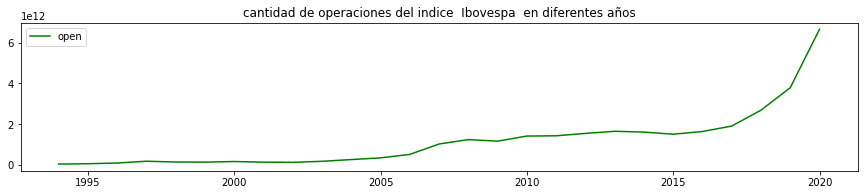

In [14]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.plot(data_group_year['year'], data_group_year['volume'],label = 'open', linestyle='-', color='g')
plt.title('cantidad de operaciones del indice  Ibovespa  en diferentes años')
plt.legend()

se observa un comportamiento creciente de la cantidad de operaciones diarias a travez de los años con mas relevancio despues del 2015

## Selección de la acción

In [15]:
dataset.groupby(['ticker']).count().sort_values('open',ascending=False)

,datetime,open,close,high,low,volume,year,month
ticker,,,,,,,,
BBDC4,5641,5641,5641,5641,5641,5641,5641,5641
ELET6,5641,5641,5641,5641,5641,5641,5641,5641
CPLE6,5641,5641,5641,5641,5641,5641,5641,5641
ELET3,5641,5641,5641,5641,5641,5641,5641,5641
SBSP3,5641,5641,5641,5641,5641,5641,5641,5641
...,...,...,...,...,...,...,...,...
CJS 3,1,1,1,1,1,1,1,1
BEP 6,1,1,1,1,1,1,1,1
TBAS4,1,1,1,1,1,1,1,1


se escoge la acción BBDC4 dado que tiene mayor número de registros a lo largo del tiempo

## EDA de acción BBDC4

In [16]:
data_stock = dataset[dataset.ticker.isin(['BBDC4'])]
data_stock  = data_stock .reset_index(drop=True)
data_stock

,datetime,ticker,open,close,high,low,volume,year,month
0,1998-03-16,BBDC4,10.90,10.95,10.95,10.65,8.684946e+06,1998,3
1,1998-03-17,BBDC4,10.89,11.20,11.20,10.89,1.458141e+07,1998,3
2,1998-03-18,BBDC4,11.10,11.10,11.35,11.10,1.065082e+07,1998,3
3,1998-03-19,BBDC4,11.20,11.20,11.25,11.08,1.043042e+07,1998,3
4,1998-03-20,BBDC4,11.20,11.80,11.80,11.20,8.596442e+06,1998,3
...,...,...,...,...,...,...,...,...,...
5636,2020-12-22,BBDC4,26.76,27.10,27.25,26.76,8.619520e+08,2020,12
5637,2020-12-23,BBDC4,27.32,27.72,27.90,27.16,7.282858e+08,2020,12
5638,2020-12-28,BBDC4,28.10,27.99,28.26,27.92,1.052361e+09,2020,12
5639,2020-12-29,BBDC4,27.82,27.53,27.88,27.37,6.109755e+08,2020,12


se extraen los datos solo de la acción escogida en la que se tienen 5641 registros desde 1994 hasta 2020.

In [17]:
data_stock.describe()

,open,close,high,low,volume,year,month
count,5641.000000,5641.000000,5641.000000,5641.000000,5.641000e+03,5641.000000,5641.000000
mean,35.287493,35.297172,35.782636,34.768580,2.081130e+08,2009.095373,6.548307
std,28.787841,28.851425,29.184685,28.459273,2.601502e+08,6.581064,3.398036
min,4.700000,4.750000,5.500000,4.650000,6.241017e+05,1998.000000,1.000000
25%,15.150000,15.100000,15.400000,14.900000,2.893243e+07,2003.000000,4.000000
50%,30.410000,30.400000,30.790000,30.050000,1.377260e+08,2009.000000,7.000000
75%,36.150000,36.130000,36.520000,35.680000,2.639294e+08,2015.000000,9.000000
max,196.890000,203.200000,204.430000,196.000000,3.259748e+09,2020.000000,12.000000


en promedio la acción a lo largo de los años está en 35.2, el mínimo 15.15 y el máximo en 196, este último está muy lejos del tercer cuartil por lo que hay que analizar el comportamiento a lo largo del tiempo para determinar si este valor afecta los valores para el modelo.

no hay grandes diferencias entre los valores de open,close,high, por lo que se puede analizar datos con una de estas features y así evitar realizar tantos análisis que nos lleven a la misma conclusión.


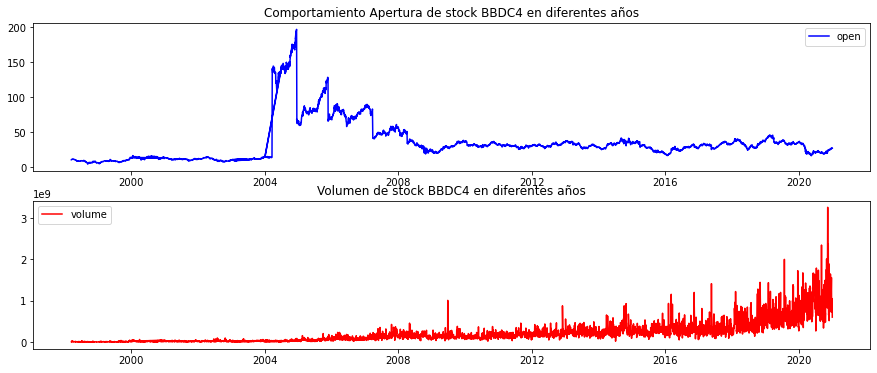

In [18]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.plot(data_stock['datetime'], data_stock['open'],label = 'open', linestyle='-', color='b')
plt.title('Comportamiento Apertura de stock BBDC4 en diferentes años')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(data_stock['datetime'], data_stock['volume'],label = 'volume', linestyle='-', color='r')
plt.title('Volumen de stock BBDC4 en diferentes años')
plt.legend()

se puede apreciar valores de la acción muy altos en el año 2005 aproximadamente, se debe revisar con más detenimiento.

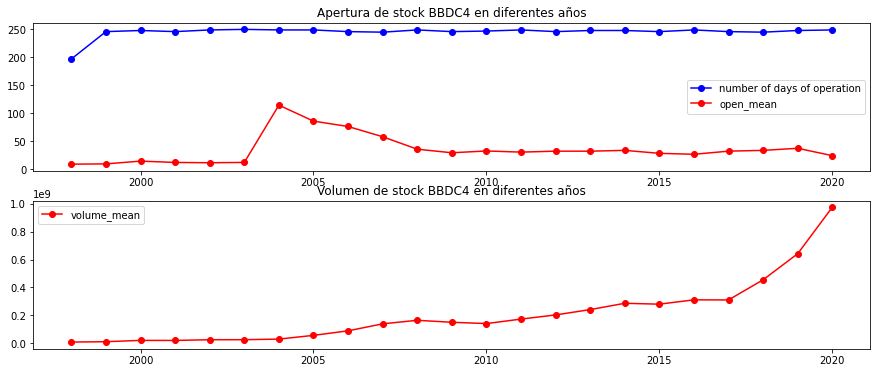

In [19]:


group_stock=data_stock.groupby('year').agg(['count','mean']).reset_index()

#renombrando columnas
group_stock.columns = ['year','open_count','open_mean','close_count','close_mean','high_count','high_mean','low_count','low_mean','volume_count','volume_mean','month_count','month_mean']
#fig, ax = plt.subplots()
plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
plt.plot(group_stock['year'], group_stock['open_count'],label = 'number of days of operation', marker='o', linestyle='-', color='b')
plt.plot(group_stock['year'], group_stock['open_mean'],label = 'open_mean', marker='o', linestyle='-', color='r')
plt.title('Apertura de stock BBDC4 en diferentes años')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(group_stock['year'], group_stock['volume_mean'],label = 'volume_mean', marker='o', linestyle='-', color='r')
plt.title('Volumen de stock BBDC4 en diferentes años')
plt.legend()

plt.show()

en la media de cada año de la apertura de la acción se observa que en el 2005 ocurrió un comportamiento extraño hay que seguir indagando.

## Análisis de valores atípicos

Realizando diagrama de Boxplot para la apertura de la acción

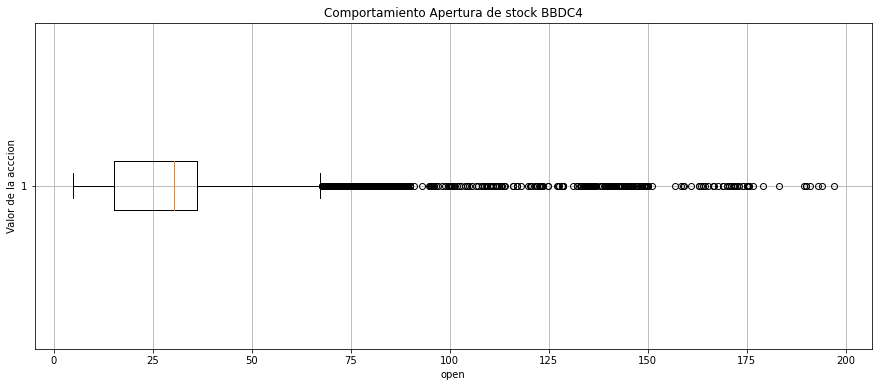

la media de open es:  35.28749335224262


In [20]:

plt.figure(figsize=(15, 6))  # Tamaño de la figura (ancho x alto)
plt.boxplot(data_stock['open'], vert=False)  # 'Columna_de_interés' representa los datos que quieres visualizar

# Personalizar el gráfico
plt.title('Comportamiento Apertura de stock BBDC4')
plt.xlabel('open')
plt.ylabel('Valor de la acccion')
plt.grid(True)  # Mostrar cuadrícula

# Mostrar el gráfico
plt.show()
print('la media de open es: ',data_stock['open'].mean())

se ven muchos valores atípicos por encima de 100 hay que revisar con mayor detenimiento cada una de las features de los precios, para eso se realizaran histogramas.

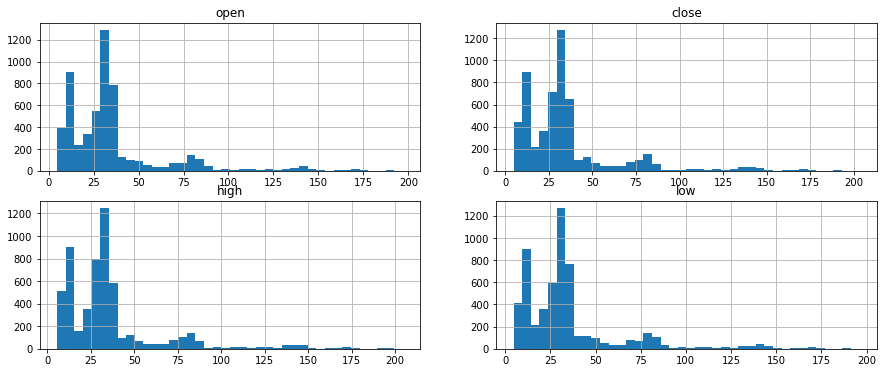

In [21]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
data_stock.open.hist(bins=40)
plt.title('open')
plt.subplot(2, 2, 2)
data_stock.close.hist(bins=40)
plt.title('close')
plt.subplot(2, 2, 3)
data_stock.high.hist(bins=40)
plt.title('high')
plt.subplot(2, 2, 4)
data_stock.low.hist(bins=40)
plt.title('low')
plt.show()

se ve un comportamiento muy similar entre apertura, cierre, altos y bajos, parece haber pocos valore atípicos por encima de 100 los examinaremos con detenimiento.

In [22]:
data_stock[data_stock.open>100]

,datetime,ticker,open,close,high,low,volume,year,month
1489,2004-03-22,BBDC4,141.03,139.20,143.00,139.02,27895470.0,2004,3
1490,2004-03-23,BBDC4,139.10,137.90,141.00,136.50,20687160.0,2004,3
1491,2004-03-24,BBDC4,139.00,135.02,139.00,135.00,25067888.0,2004,3
1492,2004-03-25,BBDC4,135.02,134.50,136.50,134.50,20086418.0,2004,3
1493,2004-03-26,BBDC4,135.00,135.35,137.50,135.00,14574644.0,2004,3
...,...,...,...,...,...,...,...,...,...
1902,2005-11-16,BBDC4,127.01,127.20,127.80,126.50,50786477.0,2005,11
1903,2005-11-17,BBDC4,127.20,128.00,128.55,126.32,85010951.0,2005,11
1904,2005-11-18,BBDC4,128.50,127.20,128.50,126.01,53294686.0,2005,11
1905,2005-11-21,BBDC4,128.30,127.90,128.30,126.78,44597636.0,2005,11


se tienen 236 registros por encima de 100 que equivalen al 4% de todas las operaciones de esta acción por lo que para este caso dada la baja proporción se procederá a eliminar para que el modelo obtenga mejores resultados.

In [23]:
data_stock = data_stock[data_stock.open<100] #solo se dejan los valores menores a 100
data_stock = data_stock.reset_index(drop=True)
data_stock

,datetime,ticker,open,close,high,low,volume,year,month
0,1998-03-16,BBDC4,10.90,10.95,10.95,10.65,8.684946e+06,1998,3
1,1998-03-17,BBDC4,10.89,11.20,11.20,10.89,1.458141e+07,1998,3
2,1998-03-18,BBDC4,11.10,11.10,11.35,11.10,1.065082e+07,1998,3
3,1998-03-19,BBDC4,11.20,11.20,11.25,11.08,1.043042e+07,1998,3
4,1998-03-20,BBDC4,11.20,11.80,11.80,11.20,8.596442e+06,1998,3
...,...,...,...,...,...,...,...,...,...
5399,2020-12-22,BBDC4,26.76,27.10,27.25,26.76,8.619520e+08,2020,12
5400,2020-12-23,BBDC4,27.32,27.72,27.90,27.16,7.282858e+08,2020,12
5401,2020-12-28,BBDC4,28.10,27.99,28.26,27.92,1.052361e+09,2020,12
5402,2020-12-29,BBDC4,27.82,27.53,27.88,27.37,6.109755e+08,2020,12


graficando nuevamente eliminando los valores atípicos.

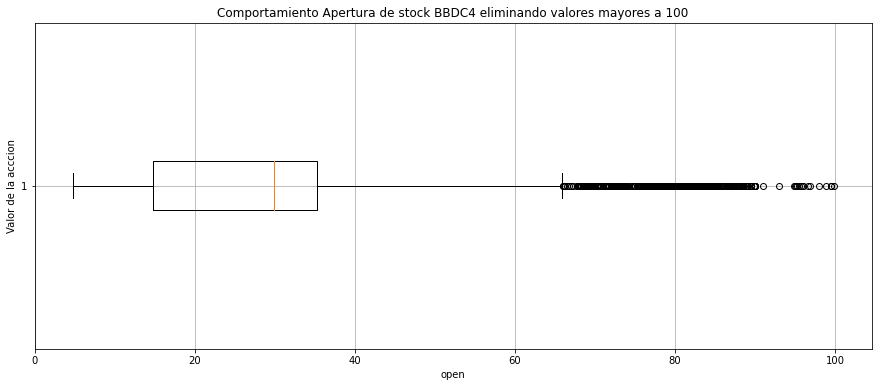

la media de open es:  30.74380458919319


In [24]:

plt.figure(figsize=(15, 6))  # Tamaño de la figura (ancho x alto)
plt.boxplot(data_stock['open'], vert=False)  # 'Columna_de_interés' representa los datos que quieres visualizar

# Personalizar el gráfico
plt.title('Comportamiento Apertura de stock BBDC4 eliminando valores mayores a 100')
plt.xlabel('open')
plt.ylabel('Valor de la acccion')
plt.grid(True)  # Mostrar cuadrícula

# Mostrar el gráfico
plt.show()
print('la media de open es: ',data_stock['open'].mean())

aún hay valores atípicos pero disminuyeron considerablemente, la medio paso de 35 a 30

## Pairplot

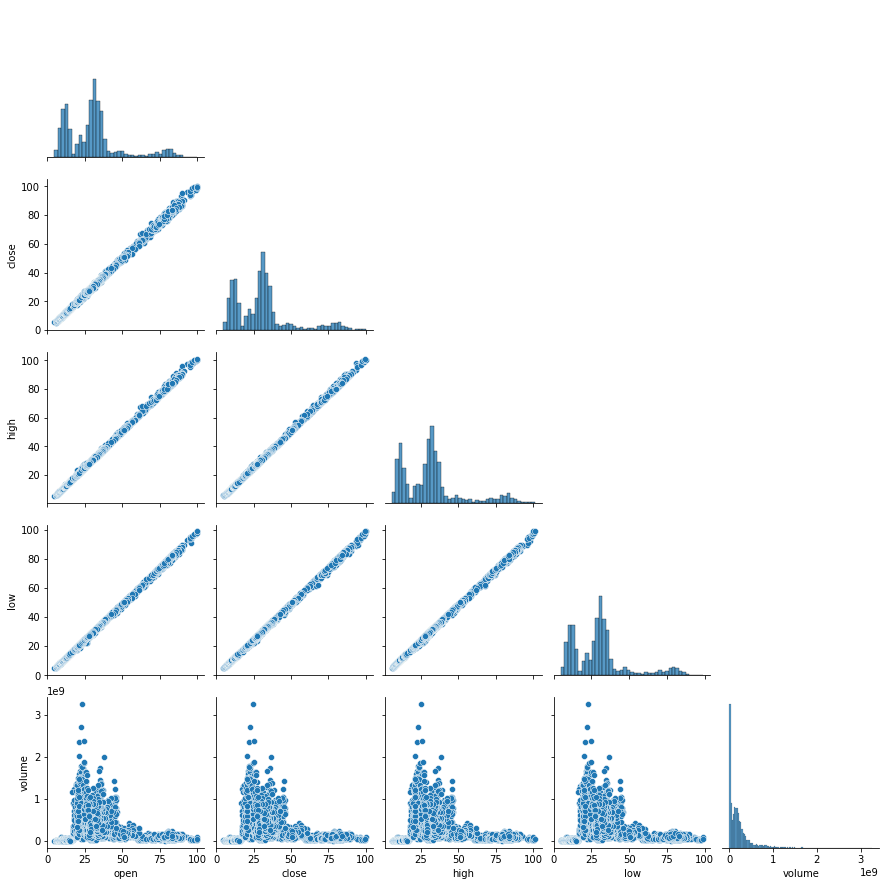

In [25]:

sns.pairplot(data=data_stock[['open','close','high','low','volume']],corner=True)
plt.show()

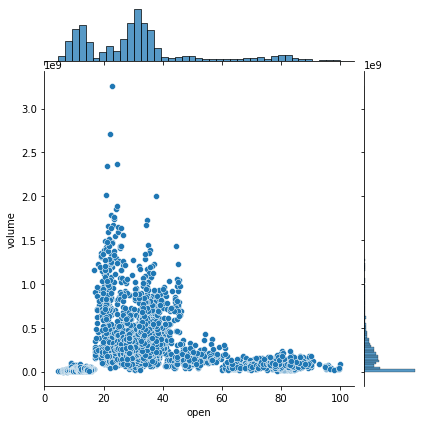

In [26]:
sns.jointplot(data=data_stock,x= 'open',y='volume')
plt.show()

se puede ver una relación muy lineal y proporcional entre aperturas y cierres ya que las variaciones son muy mínimas, el volumen alcanza a verse una distribución normal pero con muchos outliers

## Construcción de la etiqueta

Dado que el objetivo es predecir el precio de apertura de la acción de la fecha siguiente tomando como referencia los movimientos de la fecha actual se construirá la etiqueta de cada registro con la feature open de la fecha siguiente.

Nota:lo anterior es una suposición no quiere decir que en mercado en la realidad se comporte de esta manera

In [27]:
# Crear la columna 'Nueva_columna'
data_stock['etiqueta'] = None


for i in range(len(data_stock) - 1):  # Iterar hasta el penúltimo índice
    data_stock.at[i, 'etiqueta'] = data_stock['open'].iloc[i + 1]

data_stock = data_stock.drop(data_stock.index[-1]) #se elimina ultimo registro ya que no tieen apertura del dia siguiente
data_stock = data_stock.reset_index(drop=True)
data_stock

,datetime,ticker,open,close,high,low,volume,year,month,etiqueta
0,1998-03-16,BBDC4,10.90,10.95,10.95,10.65,8.684946e+06,1998,3,10.89
1,1998-03-17,BBDC4,10.89,11.20,11.20,10.89,1.458141e+07,1998,3,11.1
2,1998-03-18,BBDC4,11.10,11.10,11.35,11.10,1.065082e+07,1998,3,11.2
3,1998-03-19,BBDC4,11.20,11.20,11.25,11.08,1.043042e+07,1998,3,11.2
4,1998-03-20,BBDC4,11.20,11.80,11.80,11.20,8.596442e+06,1998,3,11.7
...,...,...,...,...,...,...,...,...,...,...
5398,2020-12-21,BBDC4,26.60,26.56,27.09,26.53,1.559189e+09,2020,12,26.76
5399,2020-12-22,BBDC4,26.76,27.10,27.25,26.76,8.619520e+08,2020,12,27.32
5400,2020-12-23,BBDC4,27.32,27.72,27.90,27.16,7.282858e+08,2020,12,28.1
5401,2020-12-28,BBDC4,28.10,27.99,28.26,27.92,1.052361e+09,2020,12,27.82


se anexa feature llamada etiqueta al dataset

# Modelos de predicción

a continuación se implementara modelo de regresión lineal simple LinearRegression sin ajustar ningún parámetro con el fin de realizar la predicción de la acción.

## LinearRegression

In [28]:
from sklearn.preprocessing import StandardScaler #para escalar datos
from sklearn.linear_model import LinearRegression #para modelo
from sklearn.model_selection import train_test_split #para probar modelo

In [29]:
#se separan las columna de prediccion y las x
X_cols =  ['open','close','high','low','volume'] 
y_col = ['etiqueta']

X = data_stock[X_cols].values
y = data_stock[y_col].values

#separacion de los datos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Estandarizacion
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

#Estandarizacion de las varian¡bles de test y entrenamiento
X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

#modelo
model = LinearRegression()
model.fit(X_train,y_train)
#prediccion 
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

## Métricas

utilizando el score para analizar los esultados del modelo

In [30]:
import sklearn.metrics as metrics
from sklearn import metrics
r2_test = metrics.r2_score(y_test,y_pred)
print('r2 test :', r2_test.round(4))
r2_y_train = metrics.r2_score(y_train,y_train_pred)
print('r2 train :', r2_y_train.round(4))

r2 test : 0.9993
r2 train : 0.9954


se obtiene un muy buen score con solo el modelo de regresión lineal simple son muy cercanos los resultados del test y del entrenamiento son muy cercanos por lo que parece ser un buen modelo para este caso.

analizando un poco más el peso que las features  tienen sobre el modelo se tiene lo siguiente:

In [31]:
from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [32]:
y_test = y_test.reshape(-1)

print('==========Summary===========')
stats.summary(model, X_test, y_test, X_cols)

==========Summary===========
Residuals:
    Min      1Q  Median     3Q    Max
-0.2073 -0.0095  0.0002 0.0073 0.3421


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept -0.000103    0.000696  -0.1478  0.882483
open       -0.013489    0.031941  -0.4223  0.672862
close       0.926432    0.032078  28.8810  0.000000
high        0.156010    0.038230   4.0808  0.000048
low        -0.071532    0.035453  -2.0177  0.043825
volume     -0.000249    0.000645  -0.3864  0.699272
---
R-squared:  0.99934,    Adjusted R-squared:  0.99934
F-statistic: 409919.65 on 5 features


de la tabla anterior por ahora lo importante es R-squared y Adjusted R-squared no tienen diferencias significativas. En el p-value la feature que más tiene peso es “open”. Dado que son pocas features no se aplicara reducción con PCA. 

## Análisis de residuales

aunque el score fue muy bueno es necesario identificar que tan dispersos están los puntos que se predijeron en la prueba respecto a los reales y con eso verificar si es necesario seguir ajustando el modelo.

se aplica la transformada inversa de los datos para poder ver los residuales con los precios originales y no los escalados.

In [33]:
y_pred_inv = sc_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv =  sc_y.inverse_transform(y_test.reshape(-1, 1))
y_train_inv =  sc_y.inverse_transform(y_train.reshape(-1, 1))
y_train_pred_inv =  sc_y.inverse_transform(y_train_pred.reshape(-1, 1))


se grafican los residuales que es la resta entre los valores reales y los que se predijeron para cada uno de los precios.

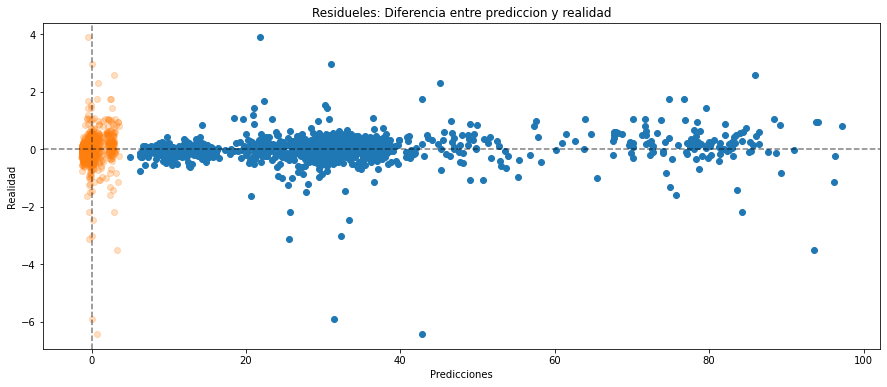

In [34]:
plt.figure(figsize=(15, 6))
residuals = np.subtract(y_test_inv, y_pred_inv)
plt.scatter(y_pred_inv, residuals)

plt.axvline(x = 0, c='k', ls='--', alpha=0.5)
plt.axhline(y = 0, c='k', ls='--', alpha=0.5)
plt.scatter(y_pred, residuals, alpha=0.25)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
plt.title('Residueles: Diferencia entre prediccion y realidad')

plt.show()

aunque hay un muy buen score hay muchos puntos dispersos que se alejan de 0, por tal razón se probaran otros modelos con algoritmos de regresión más robustos y profundos.

ahora haciendo una prueba aleatoria con un registro del dataset elegido a la azar

In [35]:
import random

In [36]:
dato_stock_ale = data_stock.sample() # escogiendo registro al azar
dato_stock_ale_p = dato_stock_ale [['open','close','high','low','volume']] #seleccionando features de entrada
dato_stock_ale_p = dato_stock_ale_p.to_numpy().tolist() #pasando a una lista
dato_stock_ale_p

[[27.97, 28.46, 28.56, 27.8, 207345607.0]]

los anteriores son los datos de entrada de una acción de un día cualquiera el objetivo es predecir el precio de apertura del siguiente día.

In [37]:
X_test_p = np.array(dato_stock_ale_p)
y_pred_p = model.predict(sc_x.transform(X_test_p.reshape(1, -1))) #escalando valor para prediccion 
y_test_inv_p =  sc_y.inverse_transform(y_pred_p.reshape(-1, 1))#aplicando transformada inversa
print('el resultado de la prediccion con la que la accion abrira el dia siguiente es: ',y_test_inv_p) 

el resultado de la prediccion con la que la accion abrira el dia siguiente es:  [[28.44804485]]


visualizando el registro escogido al azar

In [38]:
dato_stock_ale 

,datetime,ticker,open,close,high,low,volume,year,month,etiqueta
4049,2015-07-10,BBDC4,27.97,28.46,28.56,27.8,207345607.0,2015,7,28.77


cómo se puede ver el resultado de la predicción del modelo respecto al valor de la etiqueta real es muy cercano

ahora se probaran otros algoritmos

# MODELOS ROBUSTOS

Dado que aplicando el LinearRegression aun presentaba residuales se intentara reducirlos evaliando diferentes modelos mas robustos y profundos como el SVR,GradientBoostingRegressor Y Ransac. 

se buscara optimizar los modelos encontrando los mejores parámetros con la ayuda del algoritmo GridSearchCV  utilizando validacion cruzada de 5 pliegues.


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
#modelos a implementar
reg = {
 'SVR' : SVR(), 
 'GRADIENT' : GradientBoostingRegressor(), 
 'ransac' : RANSACRegressor(random_state=42)
    }

#rangos de parametros de cada modelo
params = {'SVR' : {'kernel' : ['linear','poly','rbf'],'gamma' : ['auto','scale'],'C': [1,5,10]}, 
          'GRADIENT' : {'loss' : ['squared_error','absolute_error'],'learning_rate': [0.01,0.05,0.1]},
          'ransac': {'min_samples': [0.5, 0.75, 1.0],'max_trials': [50, 100, 200]}}  



best_score = 0.000000000001 #valor minimo de arranque
best_model = None
scores_values =[]
names = []
#for para iterar con cada uno de los modelos y parametros

for name , reg in reg.items():
    #algoritmo para encontrar los mejores parametros de cada modelo
    grid_reg = GridSearchCV(reg, params[name], cv = 5).fit(X_train, y_train) #cross valdation de s pliegues
    score = np.abs(grid_reg.best_score_)
    scores_values.append(score)
    #encontrar mejores estimadores
    print(name,score,grid_reg.best_estimator_)
    if score > best_score:
         best_score = score
         best_model = grid_reg.best_estimator_
        


SVR 0.9950565185054081 SVR(C=10, gamma='auto', kernel='linear')
GRADIENT 0.9944720890320212 GradientBoostingRegressor(learning_rate=0.05)
ransac 0.9953704454499546 RANSACRegressor(max_trials=50, min_samples=0.5, random_state=42)


al igual que regresor lineal simple el score para cada uno de los modelos fue muy bueno y son prácticamente iguales, como es conocido el modelo RANSAC ajusta los valores atípicos de una mejor manera por lo que se utilizara este modelo aplicando los mejores parámetros encontrados según el código anterior para este caso.

In [40]:
model_2 = RANSACRegressor(max_trials=50, min_samples=0.5, random_state=42)
model_2.fit(X_train,y_train)
y_pred_2 = model_2.predict(X_test)
y_train_pred_2 = model_2.predict(X_train)

## Análisis de Residuales  

se aplica la transformada inversa de los datos para poder ver los residuales con los precios originales y no los escalados.

In [41]:
y_pred_inv_2 = sc_y.inverse_transform(y_pred_2.reshape(-1, 1))
y_test_inv_2 =  sc_y.inverse_transform(y_test.reshape(-1, 1))
y_train_inv_2 =  sc_y.inverse_transform(y_train.reshape(-1, 1))
y_train_pred_inv_2 =  sc_y.inverse_transform(y_train_pred_2.reshape(-1, 1))


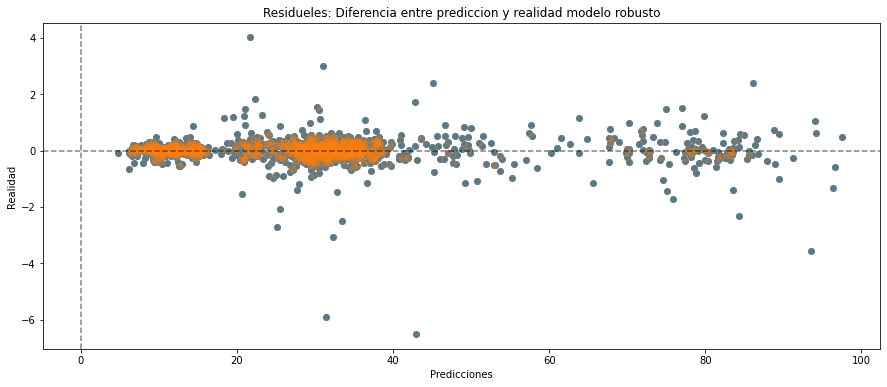

In [42]:
plt.figure(figsize=(15, 6))
residuals_2 = np.subtract(y_test_inv_2, y_pred_inv_2)
plt.scatter(y_pred_inv_2, residuals_2)

plt.axvline(x = 0, c='k', ls='--', alpha=0.5)
plt.axhline(y = 0, c='k', ls='--', alpha=0.5)
plt.scatter(y_pred_inv_2, residuals_2, alpha=0.25)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
plt.title('Residueles: Diferencia entre prediccion y realidad modelo robusto')

plt.show()

se observa que los residuales se acercan aún más a 0 con respecto a la gráfica anterior del modelo simple en especial en las predicciones más hacia la izquierda por lo que se entiende que si mejoro con el algoritmo de RANSAC.

ahora haciendo una prueba al algoritmo RANSAC con el mismo registro de la acción escogido al azar y aplicado al modelo anterior

In [43]:
dato_stock_ale_p

[[27.97, 28.46, 28.56, 27.8, 207345607.0]]

In [44]:
X_test_p = np.array(dato_stock_ale_p)
y_pred_p_2 = model_2.predict(sc_x.transform(X_test_p.reshape(1, -1))) #escalando valor para prediccion 
y_test_inv_p_2 =  sc_y.inverse_transform(y_pred_p_2.reshape(-1, 1))#aplicando transformada inversa
print('el resultado de la prediccion con la que la accion abrira el dia siguiente es: ',y_test_inv_p_2) 

el resultado de la prediccion con la que la accion abrira el dia siguiente es:  [[28.4556863]]


In [45]:
dato_stock_ale 

,datetime,ticker,open,close,high,low,volume,year,month,etiqueta
4049,2015-07-10,BBDC4,27.97,28.46,28.56,27.8,207345607.0,2015,7,28.77


cómo se puede ver el resultado de la predicción del modelo respecto al valor de la etiqueta real es muy cercano de hecho unas decimas mas cercano que lo aplicado con el regresor lineal